<a href="https://colab.research.google.com/github/QuangHuyLuu/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FINAL PROJECT**

## Diamond price prediction

###I. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### II. Extract Dataset and Get information

#### 1. Read Dataset

In [2]:
diamond_data = pd.read_csv('diamonds.csv')

In [3]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [5]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### 2. Cleaning Dataset

In [6]:
diamond_data.duplicated().sum()


np.int64(126)

In [7]:
diamond_data1 = diamond_data.drop_duplicates()

In [8]:
diamond_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  object 
 2   color    49874 non-null  object 
 3   clarity  49874 non-null  object 
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


#### 3. EDA

##### 3.1 Distribution of Diamond Price

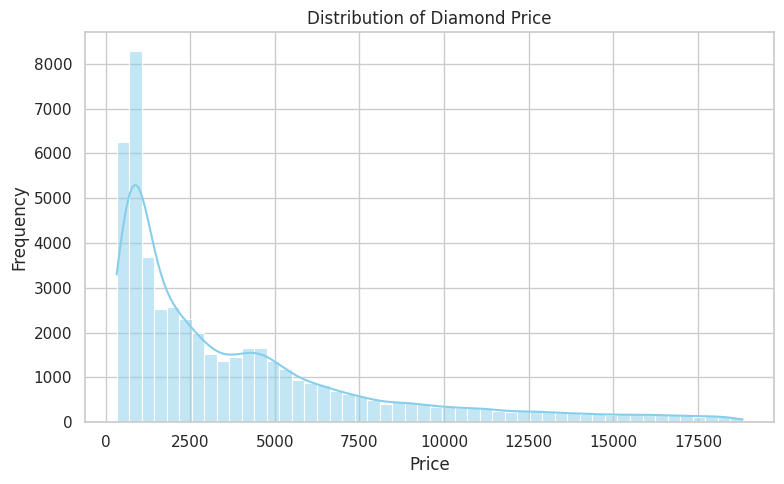

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(diamond_data1['price'], kde=True, bins=50, color="skyblue")
plt.title("Distribution of Diamond Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Biểu đồ cho thấy giá kim cương có **phân phối lệch phải** rõ rệt:

- Phần lớn kim cương có giá từ **500 đến 5000 USD**, tập trung nhiều nhất trong khoảng **1000–2000 USD**.
- Có một số ít viên kim cương có giá rất cao (trên 10.000 USD), tạo ra **đuôi dài về bên phải**

##### 3.2 Scatter Plot of Price with Quantitative Variables

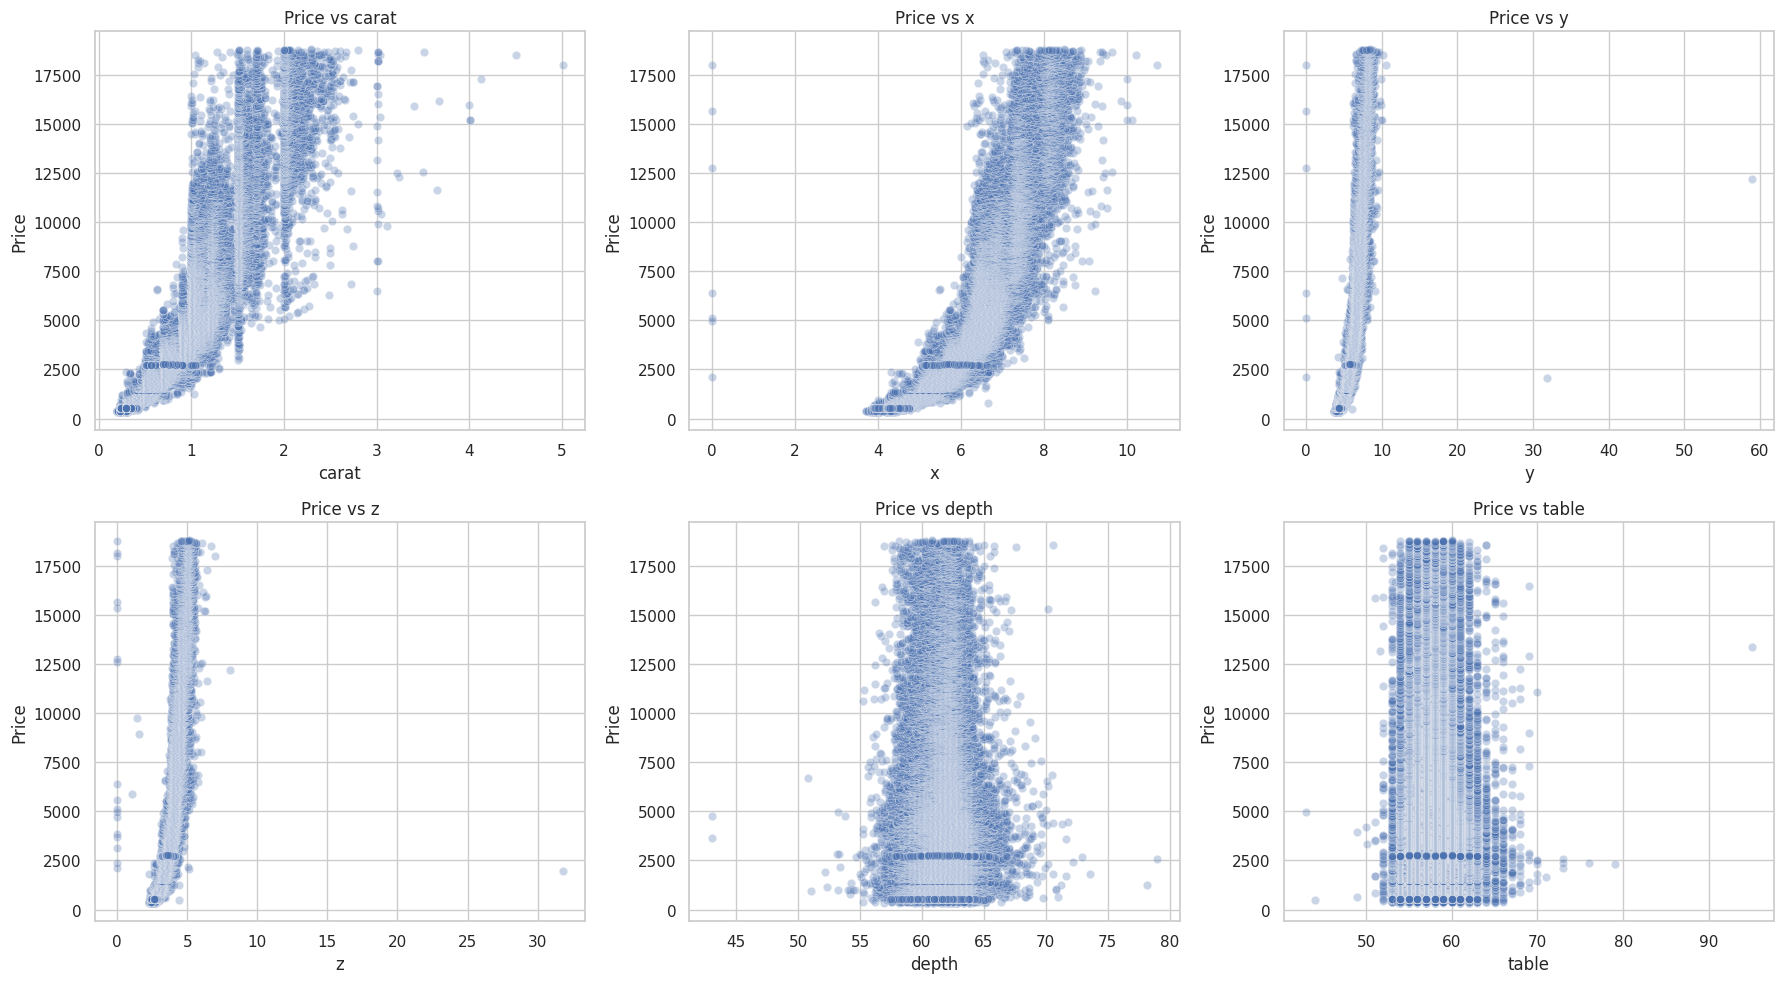

In [10]:
quantitative_vars = ['carat', 'x', 'y', 'z', 'depth', 'table']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, var in enumerate(quantitative_vars):
    sns.scatterplot(data=diamond_data1, x=var, y='price', alpha=0.3, ax=axs[i])
    axs[i].set_title(f'Price vs {var}')
    axs[i].set_ylabel('Price')
    axs[i].set_xlabel(var)

plt.tight_layout()
plt.show()

- `carat`, `x`, `y`, `z` có **tương quan dương mạnh với price**, đặc biệt là `carat`, cho thấy chúng là những biến quan trọng trong việc định giá.
- Đối với `carat` có một số outliers với `carat` > 3.
- `depth` và `table` không có mối tương quan tuyến tính rõ ràng với price, cho thấy **tầm ảnh hưởng hạn chế** của chúng trong mô hình dự đoán.

In [11]:
diamond_data1 = diamond_data1[(diamond_data1['carat'] <= 3)]

In [12]:
diamond_data1.shape

(49844, 10)

##### 3.3 Box Plot of Price with Categorical variables

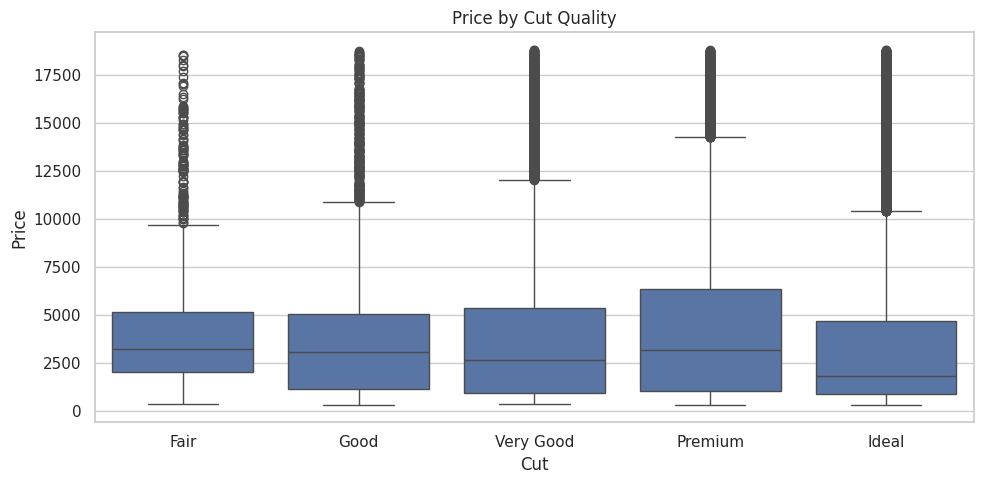

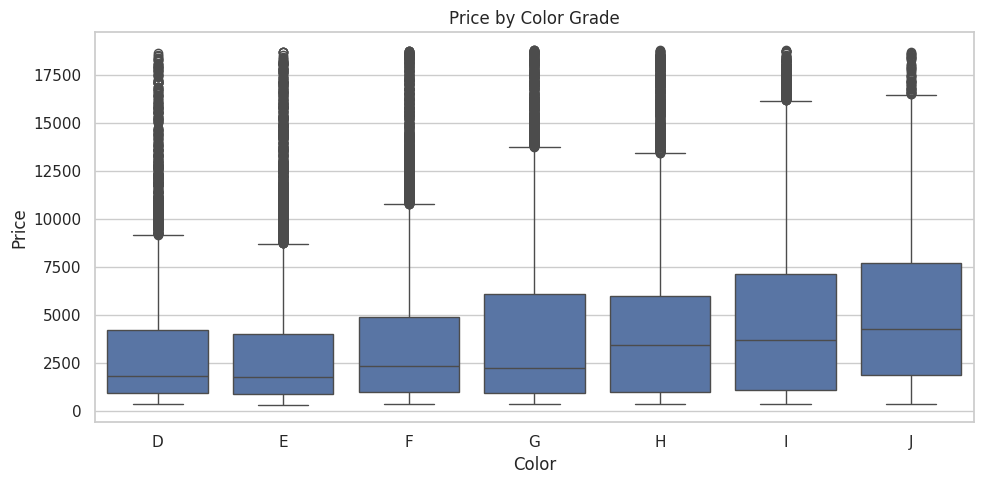

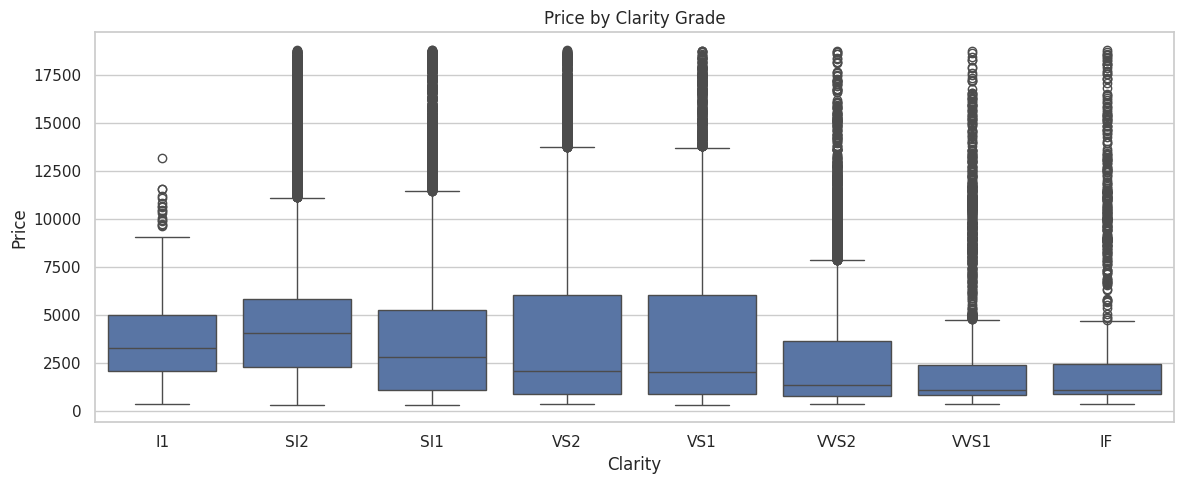

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=diamond_data1, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title("Price by Cut Quality")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=diamond_data1, x='color', y='price', order=list('DEFGHIJ'))
plt.title("Price by Color Grade")
plt.xlabel("Color")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.boxplot(data=diamond_data1, x='clarity', y='price', order=clarity_order)
plt.title("Price by Clarity Grade")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

⚠️ Ghi chú về Outliers:

- Các boxplot trên cho thấy **outliers xuất hiện rất nhiều ở tất cả nhóm phân loại**.
- Tuy nhiên, việc loại bỏ outliers có thể **làm mất đáng kể dữ liệu hợp lệ**, đặc biệt là với kim cương có giá trị cao.
- Do đó, **không loại bỏ outliers**, mà giữ nguyên toàn bộ dữ liệu để đảm bảo mô hình học được **sự đa dạng về giá và chất lượng** trong thị trường thực tế.

##### 3.4 One Hot Encoding

In [14]:
df_encoding = pd.get_dummies(diamond_data1, columns=['cut', 'color', 'clarity'], drop_first=True)


In [15]:
exclude_cols = ['cut', 'color', 'clarity']
diamond_data1_encoded = df_encoding.apply(lambda x: x.astype(int) if x.name not in exclude_cols else x)

In [16]:
diamond_data1_encoded.sample(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
25615,2,61,55,18508,8,8,5,0,1,0,...,0,0,1,0,1,0,0,0,0,0
26607,0,63,59,678,4,4,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4732,1,57,65,3763,6,6,3,1,0,0,...,0,0,0,0,0,1,0,0,0,0
27734,0,61,59,711,4,4,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41061,0,59,61,1577,5,5,3,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#### 4. Correlation

In [17]:
corr_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


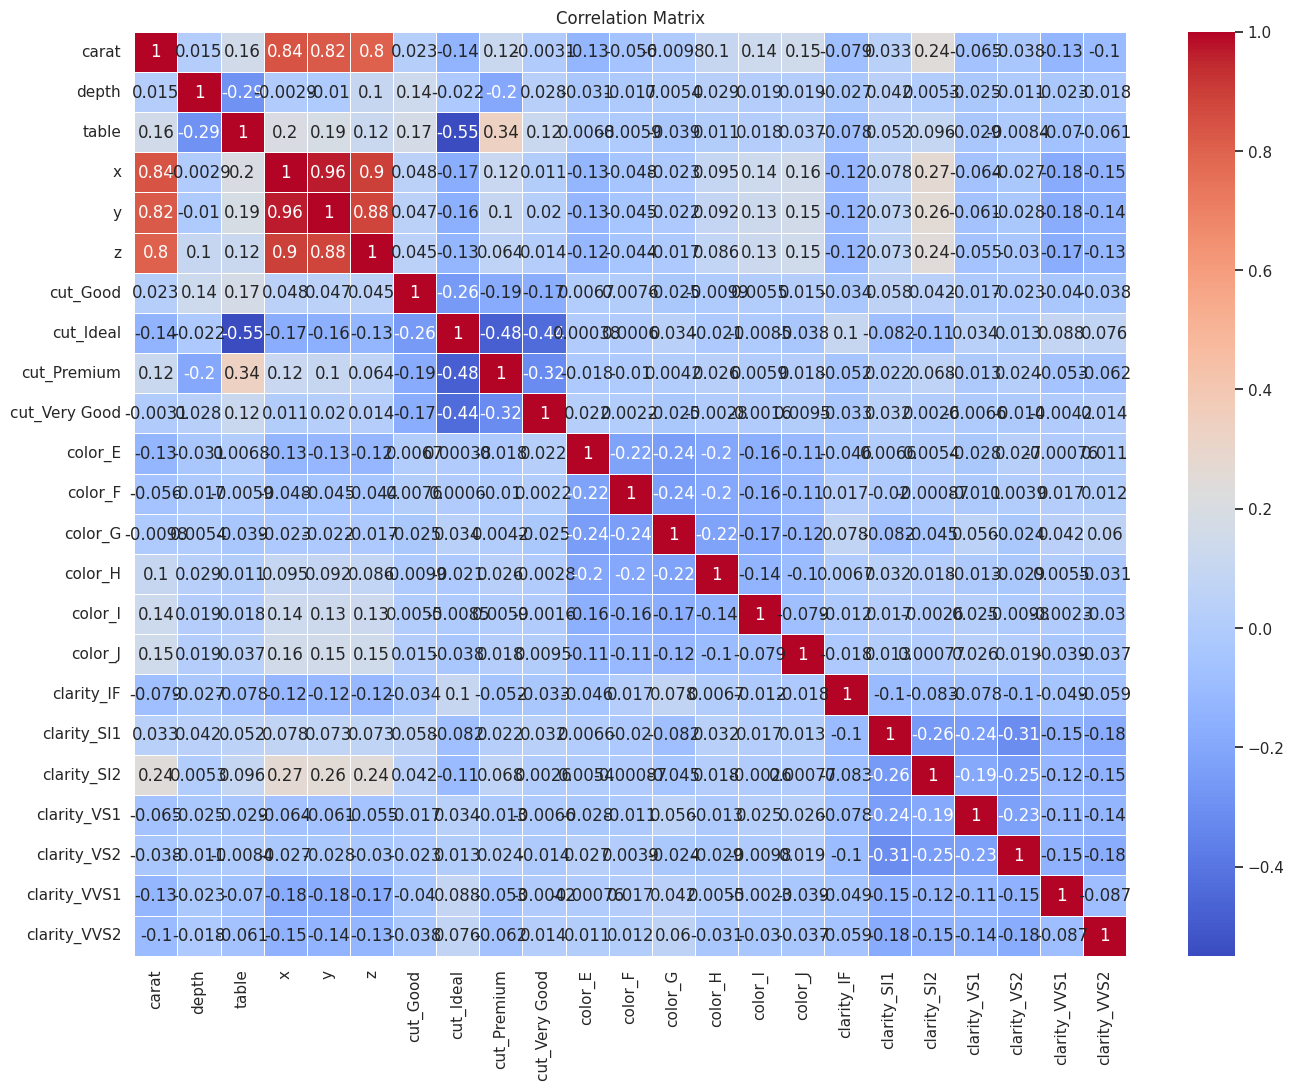

In [18]:
corr_matrix = diamond_data1_encoded[corr_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Ba biến `x`, `y`, `z` đại diện cho chiều dài, chiều rộng và chiều cao của viên kim cương.
- Tuy nhiên, theo ma trận tương quan, cả 3 biến này có:
  - **Tương quan rất cao với nhau** (ví dụ: `x` và `y` ~0.96),
  - **Tương quan cao với `carat`** (trên 0.8),
  - Điều này cho thấy có hiện tượng **đa cộng tuyến cao**, làm tăng tính dư thừa thông tin trong mô hình.

- Ngoài ra, trong tập dữ liệu đã có biến `depth`, được tính dựa trên `z` chia cho đường kính trung bình → phần nào đã phản ánh tỷ lệ kích thước.

✅ **Kết luận**: Để giảm đa cộng tuyến, đơn giản hóa mô hình và tránh trùng lặp thông tin, quyết định **loại bỏ các biến `x`, `y`, `z`** khỏi tập dữ liệu huấn luyện.

In [19]:
diamond_data1_encoded.drop(columns=['x','y','z'], axis=1, inplace=True)

In [20]:
diamond_data1_encoded.shape

(49844, 21)

In [21]:
corr_columns1 = ['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


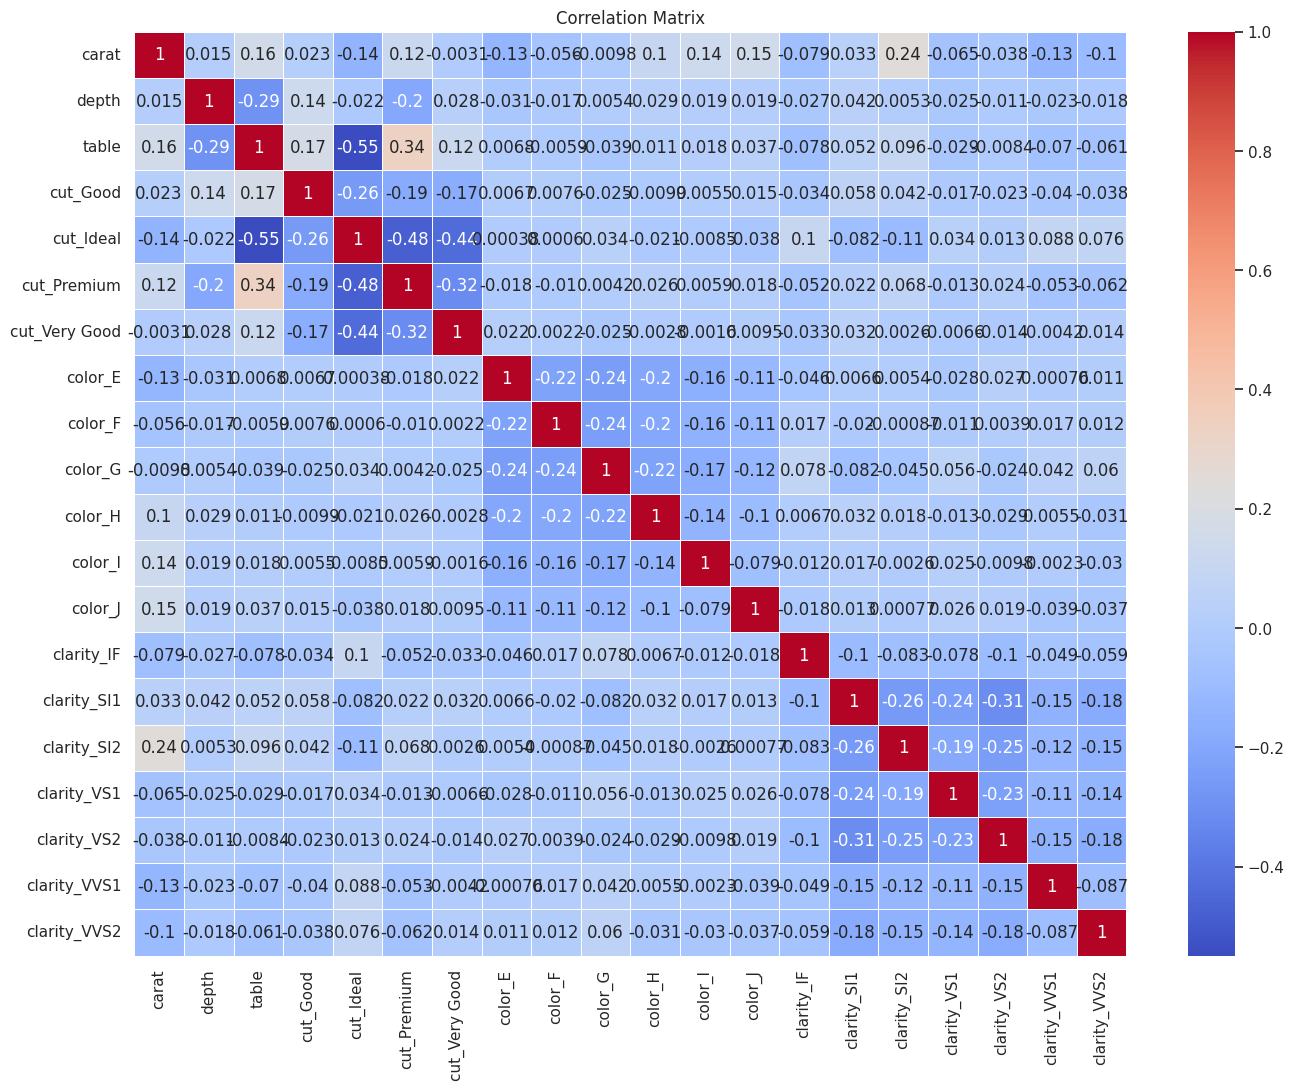

In [22]:
corr_matrix = diamond_data1_encoded[corr_columns1].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Không có cặp biến nào có hệ số tương quan tuyệt đối > 0.8.

✅ **Kết luận**: Bộ biến sau khi loại `x`, `y`, `z` là hợp lý. Các biến phân loại sau one-hot encoding có mối quan hệ phù hợp, không gây đa cộng tuyến nghiêm trọng. Có thể sử dụng trực tiếp để huấn luyện mô hình.

#### 5. Modeling

##### 5.1 Linear Regression

In [23]:
# test 1
import statsmodels.api as sm
X = diamond_data1_encoded.drop(columns=['price'])
y = diamond_data1_encoded['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     7617.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        08:25:39   Log-Likelihood:            -4.4908e+05
No. Observations:               49844   AIC:                         8.982e+05
Df Residuals:                   49823   BIC:                         8.984e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3063.5699    652.207     -4.697

`depth`, `color_F` do not fit the model

In [24]:
#test 2
X = diamond_data1_encoded.drop(columns=['price', 'depth', 'color_F'])
y = diamond_data1_encoded['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     8462.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        08:25:45   Log-Likelihood:            -4.4908e+05
No. Observations:               49844   AIC:                         8.982e+05
Df Residuals:                   49825   BIC:                         8.984e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3682.6387    298.113    -12.353

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = np.mean((y_test - predictions) ** 2)
rmse = np.sqrt(mse)

print('Linear Regression R2:', r2)
print('Linear Regression RMSE:', rmse)

Linear Regression R2: 0.7561641550738039
Linear Regression RMSE: 1960.384738766023


##### 5.2 Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R2: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest R2: 0.8025
Random Forest RMSE: 1794.67


##### 5.3 XGBoost

In [29]:
pip install xgboost


In [30]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R2: {r2_xgb:.4f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

XGBoost R2: 0.8180
XGBoost RMSE: 1722.69


##### 5.4 LightGBM

In [32]:
pip install lightgbm

In [60]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)

lgb_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 39875, number of used features: 18
[LightGBM] [Info] Start training from score 3948.291887


LGBMRegressor(random_state=42)

In [61]:
y_pred_lgb = lgb_model.predict(X_test)

r2_lgb = r2_score(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM R2: {r2_lgb:.4f}")
print(f"LightGBM RMSE: {rmse_lgb:.2f}")

LightGBM R2: 0.8056
LightGBM RMSE: 1742.46


In [62]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'R2 Score': [0.7561, 0.8025, 0.8180, 0.8056],
    'RMSE': [1960.3, 1794.67, 1722.69, 1742.46]
})

print("So sánh hiệu suất các mô hình hồi quy:")
display(results_df)

So sánh hiệu suất các mô hình hồi quy:


,Model,R2 Score,RMSE
0,Linear Regression,0.7561,1960.30
1,Random Forest,0.8025,1794.67
2,XGBoost,0.8180,1722.69
3,LightGBM,0.8056,1742.46


📌 Nhận xét tổng quan về hiệu suất mô hình:

- **Linear Regression** cho kết quả thấp nhất:
  - R² thấp nhất (0.7561) và RMSE cao nhất (1960.3),
  - Điều này cho thấy mô hình tuyến tính đơn giản **không phù hợp với mối quan hệ phi tuyến và phân phối phức tạp của dữ liệu**.

- **Random Forest, XGBoost và LightGBM** đều hoạt động tốt hơn nhờ khả năng:
  - Học được các mối quan hệ phi tuyến,
  - Xử lý hiệu quả tương tác giữa các biến đầu vào.

- **XGBoost là mô hình tốt nhất**, với:
  - **R² cao nhất: 0.8180** → giải thích được khoảng 82% phương sai của biến mục tiêu `price`,
  - **RMSE thấp nhất: 1722.69** → sai số dự đoán trung bình thấp nhất trong các mô hình.

### ✅ Kết luận:
> **XGBoost là lựa chọn tối ưu** cho bài toán dự đoán giá kim cương trên tập dữ liệu hiện tại.